In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [11]:
def generate_fake_data():
    t_data = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
    V_data = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]
    return np.array(t_data), np.array(V_data)

In [12]:
def logistic_growth(t, V, c, V_max):
    return c * V * (1 - V / V_max)

In [13]:
def gompertz_growth(t, V, c, V_max):
    return c * V * np.log(V_max / V)

In [14]:
def euler_method(model_growth, t, V0, c, V_max, dt):
    V = [V0]
    for i in range(1, len(t)):
        V_new = V[-1] + dt * model_growth(t[i], V[-1], c, V_max)
        V.append(V_new)
    return np.array(V)

In [15]:
def gompertz_euler(t, V0, c, V_max, dt):
    return euler_method(gompertz_growth, t, V0, c, V_max, dt)

In [16]:
def logistic_euler(t, V0, c, V_max, dt):
    return euler_method(logistic_growth, t, V0, c, V_max, dt)

In [ ]:
def gompertz_wrapper(t, c, V_max):
    """Wrapper om Gompertz-growth compatibel te maken met curve_fit."""
    V0 = 250  
    dt = t[1] - t[0]  
    V = [V0]
    for i in range(1, len(t)):
        V_new = V[-1] + dt * gompertz_growth(t[i], V[-1], c, V_max)
        V.append(V_new)
    return np.array(V)


In [ ]:
def logistic_wrapper(t, c, V_max):
    """Wrapper om Logistic-growth compatibel te maken met curve_fit."""
    V0 = 250  
    dt = t[1] - t[0]  
    V = [V0]
    for i in range(1, len(t)):
        V_new = V[-1] + dt * logistic_growth(t[i], V[-1], c, V_max)
        V.append(V_new)
    return np.array(V)

In [19]:
def fit_model(model_wrapper, t_data, V_data, p0):
    """
    Past het model aan de data aan en retourneert de optimale parameters.
    """
    popt, pcov = curve_fit(model_wrapper, t_data, V_data, p0=p0)
    return popt

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_13526/2240878432.py:2: RuntimeWarning: invalid value encountered in log
  return c * V * np.log(V_max / V)


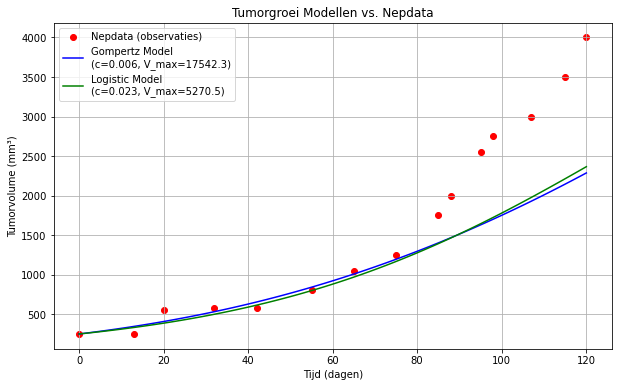

In [ ]:
if __name__ == "__main__":
    
    t_data, V_data = generate_fake_data()
    tijd = np.linspace(0, 120, 100)

    
    initial_params = [0.1, 4000]  

    
    params_gompertz = fit_model(gompertz_wrapper, t_data, V_data, p0=initial_params)
    params_logistic = fit_model(logistic_wrapper, t_data, V_data, p0=initial_params)

    
    dt = tijd[1] - tijd[0]  
    V_sim_gompertz = gompertz_euler(tijd, 250, *params_gompertz, dt)
    V_sim_logistic = logistic_euler(tijd, 250, *params_logistic, dt)

   
    plt.figure(figsize=(10, 6))

    
    plt.scatter(t_data, V_data, color="red", label="Nepdata (observaties)")

    
    plt.plot(tijd, V_sim_gompertz, label=f"Gompertz Model\n(c={params_gompertz[0]:.3f}, V_max={params_gompertz[1]:.1f})", color="blue")

   
    plt.plot(tijd, V_sim_logistic, label=f"Logistic Model\n(c={params_logistic[0]:.3f}, V_max={params_logistic[1]:.1f})", color="green")

    plt.title("Tumorgroei Modellen vs. Nepdata")
    plt.xlabel("Tijd (dagen)")
    plt.ylabel("Tumorvolume (mm³)")
    plt.legend()
    plt.grid(True)
    plt.show()

c (growth rate constant): 0.1200
Vmax (carrying capacity): 7.59


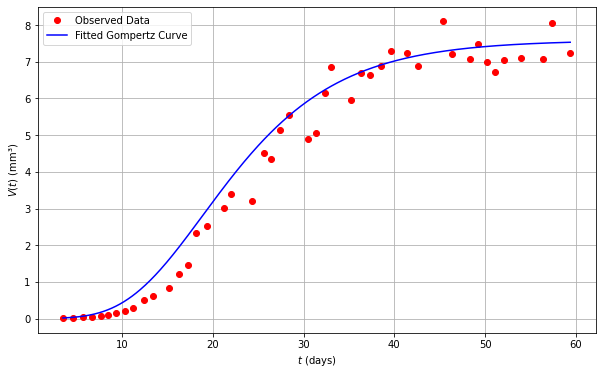

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def gompertz(ts, Vs):
    # Gompertz differential equation
    def gompertz_equation(V, t, c, Vmax):
        return c * V * np.log(Vmax / V)

    # Solve the Gompertz equation using Euler method
    def solve_gompertz(ts, V0, c, Vmax):
        dt = ts[1] - ts[0]  # Assuming a uniform time step
        Vs_pred = [V0]
        V = V0
        for t in ts[:-1]:
            dV = gompertz_equation(V, t, c, Vmax) * dt
            V += dV
            Vs_pred.append(V)
        return np.array(Vs_pred)

    # Loss function: Mean squared error
    def mse(observed, predicted):
        return np.mean((observed - predicted) ** 2)

    # Initial volume and parameter ranges
    V0 = Vs[0]
    c_range = np.linspace(0.01, 0.5, 50)  # Range for c
    Vmax_range = np.linspace(max(Vs) - 1, max(Vs) + 5, 50)  # Range for Vmax

    # Grid search for optimal parameters
    best_mse = float('inf')
    best_c, best_Vmax = None, None

    for c in c_range:
        for Vmax in Vmax_range:
            Vs_pred = solve_gompertz(ts, V0, c, Vmax)
            error = mse(Vs, Vs_pred)
            if error < best_mse:
                best_mse = error
                best_c, best_Vmax = c, Vmax

    print(f"c (growth rate constant): {best_c:.4f}")
    print(f"Vmax (carrying capacity): {best_Vmax:.2f}")

    # Generate the fitted curve using the optimal parameters
    ts_fine = np.linspace(min(ts), max(ts), 500)
    Vs_fitted = solve_gompertz(ts_fine, V0, best_c, best_Vmax)
    return best_mse, ts_fine, Vs_fitted

# Given time series and observed volumes
ts = [
    3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
Vs = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

# Plot observed data and fitted curve
best_mse, ts_fine, Vs_fitted = gompertz(ts, Vs)
plt.figure(figsize=(10, 6))
plt.plot(ts, Vs, 'ro', label='Observed Data')
plt.plot(ts_fine, Vs_fitted, '-b', label='Fitted Gompertz Curve')
plt.xlabel('$t$ (days)')
plt.ylabel('$V(t)$ (mm³)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class TumorGrowthModel:
    def __init__(self, t_data, V_data):
        self.t_data = t_data
        self.V_data = V_data
    def __str__(self):
        pass
    def __repr__(self):
        pass

    @staticmethod
    def Runga_method(model_growth, t, V0, c, V_max, dt):
        V = [V0]
        for i in range(1, len(t)):
            t_current = t[i - 1]
            V_current = V[-1]
            y1 = dt * model_growth(t_current, V_current, c, V_max)
            y2 = dt * model_growth(t_current + dt / 2, V_current + y1 / 2, c, V_max)
            y3 = dt * model_growth(t_current + dt / 2, V_current + y2 / 2, c, V_max)
            y4 = dt * model_growth(t_current + dt, V_current + y3, c, V_max)
            V_new = V_current + (y1 + 2 * y2 + 2 * y3 + y4) / 6
            V.append(V_new)
        return np.array(V)
    
    def montroll_Runga(self, t, V0, c, V_max, d, dt):
        V = [V0]  # Beginwaarde van het volume
        for i in range(1, len(t)):
            t_current = t[i - 1]
            V_current = V[-1]

            # Bereken de groeisnelheid voor Montroll's model
            y1 = dt * c * V_current * (V_max**d - V_current**d)
            y2 = dt * c * (V_current + y1 / 2) * (V_max**d - (V_current + y1 / 2)**d)
            y3 = dt * c * (V_current + y2 / 2) * (V_max**d - (V_current + y2 / 2)**d)
            y4 = dt * c * (V_current + y3) * (V_max**d - (V_current + y3)**d)

            # Bereken de nieuwe waarde van V
            V_new = V_current + (y1 + 2 * y2 + 2 * y3 + y4) / 6
            V.append(V_new)

        return np.array(V)
    
    def allee_Runga(self, t, V0, c, V_min, V_max, dt):
        V = [V0]  # Beginwaarde van het volume
        for i in range(1, len(t)):
            t_current = t[i - 1]
            V_current = V[-1]

            # Bereken de groeisnelheid voor het Allee-effect model (direct in de Runga methode)
            y1 = dt * c * (V_current - V_min) * (V_max - V_current)
            y2 = dt * c * (V_current + y1 / 2 - V_min) * (V_max - (V_current + y1 / 2))
            y3 = dt * c * (V_current + y2 / 2 - V_min) * (V_max - (V_current + y2 / 2))
            y4 = dt * c * (V_current + y3 - V_min) * (V_max - (V_current + y3))

            # Bereken de nieuwe waarde van V
            V_new = V_current + (y1 + 2 * y2 + 2 * y3 + y4) / 6
            V.append(V_new)

        return np.array(V)


    @staticmethod
    def fit_model_brute_force(model_wrapper, t_data, V_data, p0, num_iterations=10000, step_size=0.01):
        def model(t, *params):
            return model_wrapper(t, *params, V_data)  # Include V_data as an argument

        best_params = np.array(p0)
        best_cost = np.sum((model(t_data, *best_params) - V_data) ** 2)

        for _ in range(num_iterations):
            new_params = best_params + np.random.uniform(-step_size, step_size, len(p0))
            cost = np.sum((model(t_data, *new_params) - V_data) ** 2)

            if cost < best_cost:
                best_params = new_params
                best_cost = cost

        return best_params

    @staticmethod
    def calculate_aic(n, rss, k):
        return n * np.log(rss / n) + 2 * k

    @staticmethod
    def calculate_bic(n, rss, k):
        return n * np.log(rss / n) + k * np.log(n)

    @staticmethod
    def calculate_residuals(V_data, V_sim):
        residuals = V_data - V_sim
        rss = np.sum(residuals ** 2)
        return rss


class LogisticModel(TumorGrowthModel):

    @staticmethod
    def growth(t, V, c, V_max):
        return c * V * (V_max - V)

    @staticmethod
    def wrapper(t, V0, c, V_max):
        dt = t[1] - t[0]  # Assuming uniform time steps
        V = [V0]
        for i in range(1, len(t)):
            V_new = V[-1] + dt * LogisticModel.growth(t[i], V[-1], c, V_max)
            V.append(V_new)
        return np.array(V)

    @staticmethod
    def runga(t, V0, c, V_max, dt):
        return TumorGrowthModel.Runga_method(LogisticModel.growth, t, V0, dt, c, V_max)

# Mendelsohn Model
class MendelsohnModel(TumorGrowthModel):
    """ Class of Mendelsohn equations"""

    @staticmethod
    def growth(t, V, c, d):
        return c * V ** d

    @staticmethod
    def wrapper(t, c, d, V0):

        dt = t[1] - t[0]
        V = [V0]
        for i in range(1, len(t)):
            V_new = V[-1] + dt * MendelsohnModel.growth(t[i], V[-1], c, d)
            V.append(V_new)
        return np.array(V)
    @staticmethod
    def runga(t, V0, c, d, dt):
        return TumorGrowthModel.Runga_method(MendelsohnModel.growth, t, V0, c, d, dt)

# Gompertz model
class GompertzModel(TumorGrowthModel):

    @staticmethod
    def growth(t, V, c, V_max):
        return c * V * np.log(V_max / V)

    @staticmethod
    def wrapper(t, c, V_max, V0):

        dt = t[1] - t[0]
        V = [V0]
        for i in range(1, len(t)):
            V_new = V[-1] + dt * GompertzModel.growth(t[i], V[-1], c, V_max)
            V.append(V_new)
        return np.array(V)

    @staticmethod
    def runga(t, V0, c, V_max, dt):
        return TumorGrowthModel.Runga_method(GompertzModel.growth, t, V0, c, V_max, dt)

class VonBertalanffyModel(TumorGrowthModel):
    """ Von Bertalanffy Model"""
    @staticmethod
    def growth(t, V, c, d):
        """
        Equation of the Von Bertalanffy model
        :param t: t in time (days)
    g    :param V: The tumor volume (mm3)
        :param d: The growth rate
        :return: The equation of the Von Bertalanffy model
        """
        return c * V ** (2 / 3) - d * V

    @staticmethod
    def wrapper(t, c, d, V0):

        dt = t[1] - t[0]
        V = [V0]
        for i in range(1, len(t)):
            V_new = V[-1] + dt * VonBertalanffyModel.growth(t[i], V[-1], c, d)
            V.append(V_new)
        return np.array(V)
    @staticmethod
    def runga(t, V0, c, d, dt):
        return TumorGrowthModel.Runga_method(VonBertalanffyModel.growth, t, V0, c, d, dt)

class MontrollModel(TumorGrowthModel):
    @staticmethod
    def growth(t, V, c, V_max, d):
        return c * V * (V_max ** d - V ** d)

    @staticmethod
    def wrapper( t, c, V_max, d, V0):

        dt = t[1] - t[0]
        V = [V0]
        for i in range(1, len(t)):
            V_new = V[-1] + dt * MontrollModel.growth(t[i], V[-1], c, V_max, d)
            V.append(V_new)
        return np.array(V)
    @staticmethod
    def runga(t, V0, c, V_max, d, dt):
        return TumorGrowthModel.montroll_Runga(MontrollModel.growth, t, V0, c, V_max, d, dt)


class AlleeEffectModel(TumorGrowthModel):
    @staticmethod
    def growth(t, V, c, V_min, V_max):
        # Allee effect: growth rate depends on V and the boundaries V_min and V_max
        if V <= V_min or V >= V_max:
            return 0
        return c * (V - V_min) * (V_max - V)

    @staticmethod
    def wrapper(t, c, V_min, V_max, V0):

        dt = t[1] - t[0]
        V = [V0]
        for i in range(1, len(t)):
            V_new = V[-1] + dt * AlleeEffectModel.growth(t[i], V[-1], c, V_min, V_max)
            V.append(V_new)
        return np.array(V)
    
    @staticmethod
    def runga(t, V0, c, V_min, V_max, dt):
        return TumorGrowthModel.allee_Runga(AlleeEffectModel.growth, t, V0, c, V_min, V_max, dt)


class ModelEvaluator:
    def __init__(self, t_data, V_data):
        self.t_data = t_data
        self.V_data = V_data
        self.models = []

    def add_model(self, model_class, **kwargs):
        self.models.append(model_class(self.t_data, self.V_data))

    def evaluate(self, t_predict=None):
        if t_predict is None:
            t_predict = np.linspace(0, 120, len[self.t_data])  # Standard time range for prediction

        results = []
        p0_dict = {
            "LogisticModel": [0.01, 0.1],
            "MendelsohnModel": [0.01, 0.1],
            "GompertzModel": [0.11, 7.7],
            "AlleeEffectModel": [0.05, 0, 7.5],
            "VonBertalanffyModel":[0.5,0.2],
            "MontrollModel": [0.01, 8, 0.1]
        }

        for model in self.models:
            model_name = model.__class__.__name__
            if model_name not in p0_dict:
                print(f"Initial parameters for {model_name} not defined!")
                continue

            # Get initial parameters for this model
            p0 = p0_dict[model_name]
            print(f"Fitting {model_name} with initial parameters {p0}...")
            params = model.fit_model_brute_force(model.wrapper, self.t_data, self.V_data[0], p0=p0, num_iterations=10000)

            V_sim = model.runga(t_predict, self.V_data[0], *params, self.t_data[1] - self.t_data[0])

            rss = model.calculate_residuals(self.V_data, V_sim)
            aic = model.calculate_aic(len(self.V_data), rss, len(params))
            bic = model.calculate_bic(len(self.V_data), rss, len(params))

            results.append({
                'Model': model.__class__.__name__,
                'AIC': aic,
                'BIC': bic})

            plt.figure(figsize=(10, 6))
            plt.scatter(self.t_data, self.V_data, color='r', label='Data')
            plt.plot(self.t_data, V_sim, label=f"{model.__class__.__name__}", color='b')
            plt.title("Tumorgroei Modellen vs. Data")
            plt.xlabel("Tijd (dagen)")
            plt.ylabel("Tumorvolume (mm³)")
            plt.legend()
            plt.grid(True)
            plt.show()


        return results



if __name__ == "__main__":
    # Stel zelf tijd en volume data in
    tdata = [
        3.46, 4.58, 5.67, 6.64, 7.63, 8.41, 9.32, 10.27, 11.19,
        12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
        24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
        35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
        48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
    ]
    Vdata = [
        0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
        0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
        3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
        5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
        7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268,
    ]

    t_predict = np.linspace(0, 60, 45)
    model = ModelEvaluator(tdata, Vdata)
    model.add_model(LogisticModel)
    model.add_model(GompertzModel)
    model.add_model(AlleeEffectModel)
    model.add_model(MontrollModel)
    model.add_model(MendelsohnModel)
    model.add_model(VonBertalanffyModel)

    result = model.evaluate(t_predict)
    # model.visualize(t_vooruit, p0)

    df = pd.DataFrame(result).set_index('Model').sort_values("AIC")
    df1 = pd.DataFrame(result).set_index('Model').sort_values("BIC")
    print(df)
    print(df1)

FileNotFoundError: [Errno 2] No such file or directory: 'tumor_growth_data.csv'